## Visual icesat2 data on the selected region.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [2]:
import h5py
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.transform_xy import coor2coor
import numpy as np


In [3]:
path_img = 'data/rsimg/l8_kunlun_20200914.tif'


In [4]:
### read landsat 8 image and convert projection coordinates to wgs84 coordinates
rs_img, rs_img_info = readTiff(path_img)
lon1,lon2,lat1,lat2  = rs_img_info['geoextent']
lon_wgs84, lat_wgs84 = coor2coor(srs_from=rs_img_info['geosrs'], \
                          srs_to=4326, x=[lon1, lon2], y=[lat1,lat2])
extent_wgs84 = lon_wgs84 + lat_wgs84


In [23]:
### Read one-month atl03 data
plt.figure(figsize=[8, 8])
with h5py.File('data/icesat2/processed_atl03/atl03_202001_subs.h5','r') as f_atl03:
    lat_atl03_202001   = f_atl03['lat'][:]
    lon_atl03_202001   = f_atl03['lon'][:]
    h_elv_atl03_202001 = f_atl03['h_elv'][:]
    time_atl03_202001 = f_atl03['t_year'][:]
    rgt_atl03_202001 = f_atl03['rgt'][:]
    spot_atl03_202001 = f_atl03['spot'][:]
    beam_atl03_202001 = f_atl03['beam_type'][:]   # 1->strong; 0->weak
    print(f_atl03.keys())
x_atl03_202001, y_atl03_202001 = coor2coor(srs_from=4326, \
                        srs_to=rs_img_info['geosrs'], x=lon_atl03_202001, y=lat_atl03_202001)


<KeysViewHDF5 ['beam_type', 'cycle', 'h_elv', 'lat', 'lon', 'rgt', 'spot', 't_year']>


<Figure size 576x576 with 0 Axes>

In [18]:
### Read one-month ATL06 data
with h5py.File('data/icesat2/processed_ATL06/ATL06_202001_subs.h5','r') as f_atl06:
    lat_atl06_202001   = f_atl06['lat'][:]
    lon_atl06_202001   = f_atl06['lon'][:]
    h_elv_atl06_202001 = f_atl06['h_elv'][:]
    time_atl06_202001 = f_atl06['t_year'][:]
    rgt_atl06_202001 = f_atl06['rgt'][:]
    spot_atl06_202001 = f_atl06['spot'][:]
    beam_atl06_202001 = f_atl06['beam_type'][:]
    quality_atl06_202001 = f_atl06['quality_summary'][:]
    print(f_atl06.keys())
good = quality_atl06_202001==0
x_atl06_202001, y_atl06_202001 = coor2coor(srs_from=4326, \
                    srs_to=rs_img_info['geosrs'], x=lon_atl06_202001, y=lat_atl06_202001)


<KeysViewHDF5 ['beam_type', 'cycle', 'h_elv', 'lat', 'lon', 'quality_summary', 'rgt', 'spot', 't_year']>


In [21]:
### Read one-year ATL06 data
with h5py.File('data/icesat2/processed_atl06/atl06_2020_subs.h5','r') as f_atl06:
    lat_atl06_2020   = f_atl06['lat'][:]
    lon_atl06_2020   = f_atl06['lon'][:]
    h_elv_atl06_2020 = f_atl06['h_elv'][:]
    time_atl06_2020 = f_atl06['t_year'][:]
    rgt_atl06_2020 = f_atl06['rgt'][:]
    spot_atl06_2020 = f_atl06['spot'][:]
    beam_atl06_2020 = f_atl06['beam_type'][:]
    quality_atl06_2020 = f_atl06['quality_summary'][:]
    print(f_atl06.keys())
good = quality_atl06_2020==0
x_atl06_2020, y_atl06_2020 = coor2coor(srs_from=4326, \
                    srs_to=rs_img_info['geosrs'], x=lon_atl06_2020, y=lat_atl06_2020)


<KeysViewHDF5 ['beam_type', 'cycle', 'h_elv', 'h_tandem', 'lat', 'lon', 'quality_summary', 'rgt', 'spot', 't_year']>


### 1. Visualize the tracks of ATL03 and ATL06 data, respectively. 

Text(0.5, 1.0, 'ATL03 (One month)')

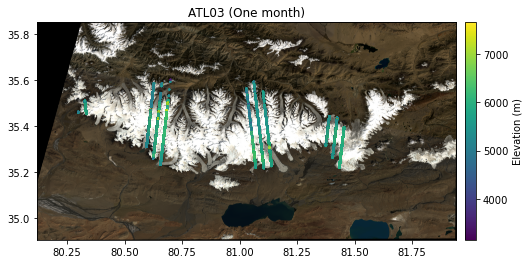

In [10]:
## Visualize the one-month atl03 data
plt.figure(figsize=(8,4))
imgShow(rs_img, extent=rs_img_info['geoextent'], \
                    color_bands=(2, 1, 0), clip_percent=5)
plt.scatter(x=x_atl03_202001, y=y_atl03_202001, s=1, c=h_elv_atl03_202001)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
plt.title('ATL03 (One month)')


Text(0.5, 1.0, 'ATL06 (One month)')

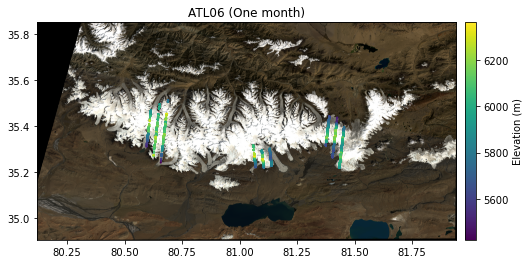

In [19]:
### Visualize the one-month ATL06 data
plt.figure(figsize=(8,4))
imgShow(rs_img, extent=rs_img_info['geoextent'], \
                    color_bands=(2, 1, 0), clip_percent=5)
imgShow(rs_img, extent=rs_img_info['geoextent'], \
                      color_bands=(2, 1, 0), clip_percent=5)
plt.scatter(x=x_atl06_202001[good], y=y_atl06_202001[good], s=1, c=h_elv_atl06_202001[good])
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
plt.title('ATL06 (One month)')


Text(0.5, 1.0, 'ATL06 (One year)')

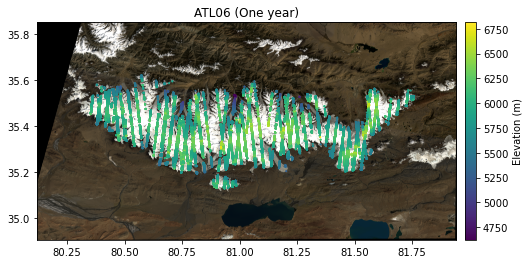

In [22]:
### Visualize the one-year ATL06 data
plt.figure(figsize=(8,4))
imgShow(rs_img, extent=rs_img_info['geoextent'], \
                    color_bands=(2, 1, 0), clip_percent=5)
imgShow(rs_img, extent=rs_img_info['geoextent'], \
                      color_bands=(2, 1, 0), clip_percent=5)
plt.scatter(x=x_atl06_2020[good], y=y_atl06_2020[good], s=1, c=h_elv_atl06_2020[good])
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
plt.title('ATL06 (One year)')


### 2. Compare the weak beam and strong beam.

Text(0.5, 1.0, 'atl06/weak (red) and strong (green) beam')

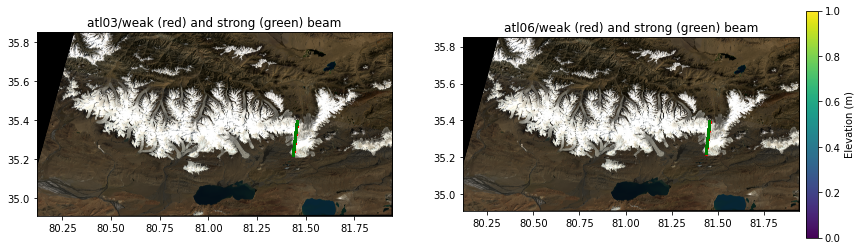

In [12]:
#### Weak beam
plt.figure(figsize=(14, 5))
### 1. atl03 data
idx_atl03_w = np.where((rgt_atl03_202001 == 142) & (spot_atl03_202001 == 6))[0]  # weak beam
idx_atl03_s = np.where((rgt_atl03_202001 == 142) & (spot_atl03_202001 == 5))[0]  # strong beam
plt.subplot(1,2,1)
imgShow(rs_img, extent = extent_wgs84, \
                          color_bands=(2, 1, 0), clip_percent=5)
plt.scatter(x=x_atl03_202001[idx_atl03_w], y=y_atl03_202001[idx_atl03_w], \
                              c='r', vmax=7000, vmin=4000, s=1)
plt.scatter(x=x_atl03_202001[idx_atl03_s], y=y_atl03_202001[idx_atl03_s], \
                              c='g', vmax=7000, vmin=4000, s=1)
plt.title('atl03/weak (red) and strong (green) beam')

### 2. atl06 data
idx_atl06_w = np.where((rgt_atl06_2020 == 142) & (spot_atl06_2020 == 6) & (time_atl06_2020 < 2020.0849))[0]
idx_atl06_s = np.where((rgt_atl06_2020 == 142) & (spot_atl06_2020 == 5) & (time_atl06_2020 < 2020.0849))[0]
plt.subplot(1,2,2)
imgShow(rs_img, extent = extent_wgs84, \
                          color_bands=(2, 1, 0), clip_percent=5)
plt.scatter(x=x_atl06_2020[idx_atl06_w], y=y_atl06_2020[idx_atl06_w], \
                          c='r', vmax=7000, vmin=4000, s=1)
plt.scatter(x=x_atl06_2020[idx_atl06_s], y=y_atl06_2020[idx_atl06_s], \
                          c='g', vmax=7000, vmin=4000,s=1)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
plt.title('atl06/weak (red) and strong (green) beam')


Text(0.5, 1.0, 'atl03 weak beam (red) and strong beam (green) tracks')

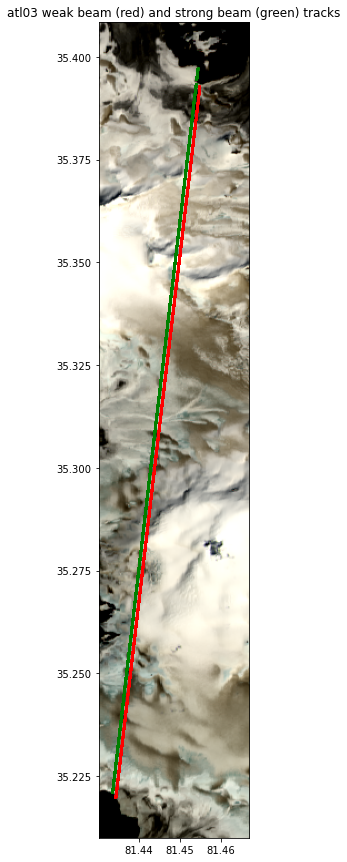

In [13]:
#### Weak-beam track vs. Strong-beam track
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
imgShow(rs_img, extent = extent_wgs84, \
                color_bands=(2, 1, 0), clip_percent=5, focus=[0.47,0.68,0.72,0.74])
plt.scatter(x=x_atl03_202001[idx_atl03_w], y=y_atl03_202001[idx_atl03_w], \
                                c='r', vmax=7000, vmin=4000, s=1)
plt.scatter(x=x_atl03_202001[idx_atl03_s], y=y_atl03_202001[idx_atl03_s], \
                                c='g', vmax=7000, vmin=4000, s=1)
plt.title('atl03 weak beam (red) and strong beam (green) tracks')


Text(0.5, 1.0, 'ATL03-ATL06/strong beam (local)')

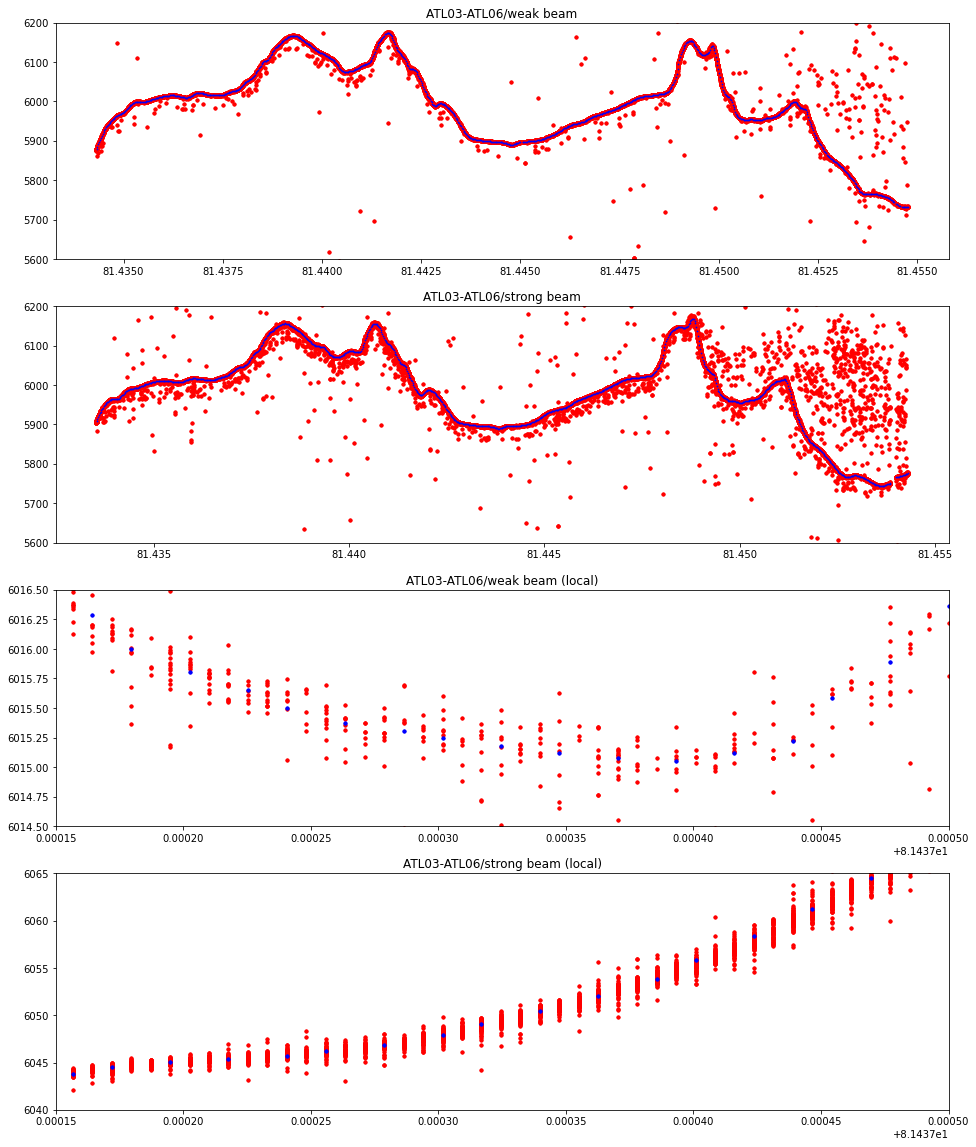

In [14]:
### 2. atl06 data
plt.figure(figsize=(16, 20))
### weak beam
plt.subplot(4,1,1)
plt.plot(x_atl03_202001[idx_atl03_w], h_elv_atl03_202001[idx_atl03_w], 'r.')
plt.plot(x_atl06_2020[idx_atl06_w], h_elv_atl06_2020[idx_atl06_w], 'b.',markersize=1)
plt.ylim(5600, 6200)
plt.title('ATL03-ATL06/weak beam')
### strong beam
plt.subplot(4,1,2)
plt.plot(x_atl03_202001[idx_atl03_s], h_elv_atl03_202001[idx_atl03_s], 'r.')
plt.plot(x_atl06_2020[idx_atl06_s], h_elv_atl06_2020[idx_atl06_s], 'b.',markersize=1)
plt.ylim(5600, 6200)
plt.title('ATL03-ATL06/strong beam')
#### sub_region
### Weak beam
plt.subplot(4,1,3)
plt.plot(x_atl03_202001[idx_atl03_w], h_elv_atl03_202001[idx_atl03_w], 'r.')
plt.plot(x_atl06_2020[idx_atl06_w], h_elv_atl06_2020[idx_atl06_w], 'b.')
plt.xlim(81.43715, 81.4375)
plt.ylim(6014.5, 6016.5)
plt.title('ATL03-ATL06/weak beam (local)')
### Strong beam
plt.subplot(4,1,4)
plt.plot(x_atl03_202001[idx_atl03_s], h_elv_atl03_202001[idx_atl03_s], 'r.')
plt.plot(x_atl06_2020[idx_atl06_s], h_elv_atl06_2020[idx_atl06_s], 'b.')
plt.xlim(81.43715, 81.4375)
plt.ylim(6040, 6065)
plt.title('ATL03-ATL06/strong beam (local)')
